In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [3]:
from sklearn.cross_validation import KFold
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# This notebook implements several different algorithms to my Capstone project data.  In summary, Random Forests, Support Vector Machines and KNN all performed the best, all having Area under an ROC Curve of 89.8%.   Logistic regression was 78% and Decision Trees was 74%.  Due to ease of implementation, my preferred one is Random Forests.

In [144]:
# Read in data

pipeline = pd.read_excel('pipelineLogR2.xlsx')

# Set up Feature and Target Values:

In [145]:
# drop the Win_Lose column, so that all other features can be used as the x values.  There are 38 features

X = pipeline.drop('Win_Lose', axis = 1)

In [6]:
# the Win_Lose column is the target column or y value

y = pipeline['Win_Lose']

# Use train_test_split to split the data:

In [7]:
# Train test split using 33% split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

#     1.  Logistic Regression:

In [8]:
logmodel = LogisticRegression()

In [9]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
predictions = logmodel.predict(X_test)

# The classification report shows an accuracy score of 71%

In [11]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.68      0.38      0.49       840
          1       0.72      0.90      0.80      1514

avg / total       0.71      0.71      0.69      2354



In [12]:
confusion_matrix(y_test,predictions)

array([[ 320,  520],
       [ 153, 1361]])

In [13]:
print accuracy_score(logmodel.predict(X_test),y_test)

0.714103653356


In [14]:
print accuracy_score(logmodel.predict(X_train),y_train)

0.70726093325


# Below is the ROC Curve

In [15]:
pred_probs = logmodel.predict_proba(X_test)

In [16]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_probs[:,1])

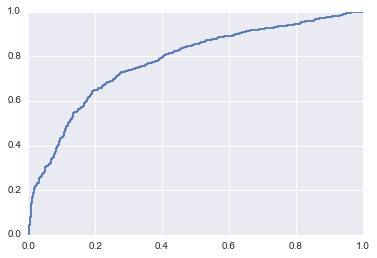

In [17]:
plt.plot(fpr, tpr)

# The area under the curve is 78%

In [18]:
auc_score = roc_auc_score(y_test, pred_probs[:,1])
print(auc_score)

0.7787255457


# Use K-Fold Cross Validation to split data into 5 folds

In [19]:
kf = KFold(len(pipeline), 5, shuffle=True, random_state=8)

In [20]:
logmodel2 = LogisticRegression()

# Calculate the Accuracy scores for the 5 folds.  The Average Accuracy score is 70.6%.  It is good that the scores are similar to when used train_test_split above.

In [21]:
accuracies = cross_val_score(logmodel2,X, y, scoring="accuracy", cv=kf)

average_accuracy = sum(accuracies) / len(accuracies)

print(accuracies)
print(average_accuracy)

[ 0.70217239  0.71829012  0.71198318  0.7026648   0.70196353]
0.707414804251


# Here are the logistic regression intercept and coefficients:

In [22]:
logmodel.intercept_[0]

-6.0112019221789915e-07

In [23]:
logmodel.coef_[0]

array([  6.87011250e-04,  -2.49508810e-02,   1.24429604e-08,
         1.93124451e-04,  -1.95043311e-04,  -1.21944363e-05,
         1.35121769e-05,   7.21854568e-05,   1.18079552e-03,
        -5.98738552e-04,   0.00000000e+00,   5.21650894e-05,
        -7.64818575e-04,  -4.76482576e-04,   1.51710666e-04,
         4.90535854e-04,   1.14502697e-03,  -1.00166017e-05,
         5.43423732e-07,   4.24830098e-04,  -5.09633768e-04,
         8.42025494e-05,   4.24830098e-04,  -1.00093118e-05,
         1.27948537e-04,  -6.48406422e-04,   5.28108675e-05,
         5.22251114e-05,   3.64191952e-04,   4.10533784e-03,
         6.12450444e-03,   7.41047339e-03,  -4.25367675e-03,
         1.14933480e-04,   1.06124725e-04,   3.62944062e-05,
        -1.01588593e-05,  -2.47794872e-04])

In [24]:
pd.DataFrame(zip(X_train.columns, logmodel.coef_[0]), columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,Fiscal_Year,6.870113e-04
1,AdjEstimatedBaseOptionDuration,-2.495088e-02
2,Amount,1.244296e-08
3,Less1m,1.931245e-04
4,1m_10m,-1.950433e-04
5,10m_30m,-1.219444e-05
6,Over30m,1.351218e-05
7,EstimatedFee,7.218546e-05
8,ProbabilityofWinning,1.180796e-03
9,1_20,-5.987386e-04


#  2.    SUPPORT VECTOR MACHINES

# Must first scale the data to be able to use SVM

In [98]:
scalerSVM = StandardScaler()

In [99]:
scalerSVM.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [100]:
scaled_featureSVM = scalerSVM.transform(X)

In [101]:
df_featSVM = pd.DataFrame(scaled_featureSVM,columns=X.columns)

In [102]:
df_featSVM.head()

,Fiscal_Year,AdjEstimatedBaseOptionDuration,Amount,Less1m,1m_10m,10m_30m,Over30m,EstimatedFee,ProbabilityofWinning,1_20,...,Days_in_Qualification,Days_in_PlanningCapture,Days_in_ProposalPriceQuote,Days_in_Negotiation,Days_in_Review,AdditionalMarkets_MultiArea_blank,Education_Workforce_Development,Energy_Environment,Food_Agriculture,Health
0,-1.506131,1.888345,0.079151,-2.002281,2.237009,-0.151478,-0.103776,0.698546,-0.397325,-0.357417,...,-0.203212,-0.110926,-0.396645,-0.186622,-0.462922,-0.546624,-0.278375,-0.474753,-0.182944,1.037285
1,-1.506131,1.888345,-0.163144,0.499430,-0.447025,-0.151478,-0.103776,-0.113179,-1.018433,-0.357417,...,-0.203212,-0.110926,-0.396645,-0.186622,-0.462922,-0.546624,-0.278375,-0.474753,-0.182944,1.037285
2,-1.506131,1.286289,-0.083930,-2.002281,2.237009,-0.151478,-0.103776,0.049166,-0.397325,-0.357417,...,-0.203212,-0.110926,-0.396645,-0.186622,-0.462922,-0.546624,-0.278375,-0.474753,-0.182944,1.037285
3,-1.506131,0.684232,-0.140038,0.499430,-0.447025,-0.151478,-0.103776,1.185580,-0.397325,-0.357417,...,-0.203212,-0.110926,-0.396645,-0.186622,-0.462922,-0.546624,-0.278375,-0.474753,-0.182944,1.037285
4,-1.506131,-0.519882,-0.198539,0.499430,-0.447025,-0.151478,-0.103776,0.698546,-1.639541,2.797851,...,-0.203212,-0.110926,-0.396645,-0.186622,-0.462922,1.829410,-0.278375,-0.474753,-0.182944,-0.964055


In [103]:
# Train test split using 33% split

X_trainSVM, X_testSVM, y_trainSVM, y_testSVM = train_test_split(df_feat, y, test_size=0.33, random_state=101)

# Run SVM algorithm

In [25]:
from sklearn.svm import SVC

In [123]:
model = SVC(probability=True)

In [124]:
model.fit(X_trainSVM,y_trainSVM)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [125]:
predictionSVM = model.predict(X_testSVM)

# The Classification Report shows an average Precision of 84% and a Recall of 83%.  Let's see if doing a grid_search to find the best parameters yields any better results.

In [126]:
print(confusion_matrix(y_testSVM,predictionSVM))
print('\n')
print(classification_report(y_testSVM,predictionSVM))

[[ 686  154]
 [ 248 1266]]


             precision    recall  f1-score   support

          0       0.73      0.82      0.77       840
          1       0.89      0.84      0.86      1514

avg / total       0.84      0.83      0.83      2354



# Use GridSearchCV to optimize the C and gamma parameters:

In [75]:
from sklearn.grid_search import GridSearchCV

In [133]:
param_grid = {'C':[0.001,0.1,1,10,100],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [138]:
grid = GridSearchCV(SVC(probability=True),param_grid,verbose=3)

In [139]:
grid.fit(X_trainSVM,y_trainSVM)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.001, gamma=1 ................................................
[CV] ....................... C=0.001, gamma=1, score=0.646801 -   4.2s
[CV] C=0.001, gamma=1 ................................................
[CV] ....................... C=0.001, gamma=1, score=0.646579 -   3.9s
[CV] C=0.001, gamma=1 ................................................
[CV] ....................... C=0.001, gamma=1, score=0.646985 -   3.9s
[CV] C=0.001, gamma=0.1 ..............................................
[CV] ..................... C=0.001, gamma=0.1, score=0.646801 -   2.9s
[CV] C=0.001, gamma=0.1 ..............................................
[CV] ..................... C=0.001, gamma=0.1, score=0.646579 -   3.0s
[CV] C=0.001, gamma=0.1 ..............................................
[CV] ..................... C=0.001, gamma=0.1, score=0.646985 -   2.9s
[CV] C=0.001, gamma=0.01 .............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done  31 tasks       | elapsed:  1.8min


[CV] ........................... C=1, gamma=1, score=0.741368 -   5.8s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.721106 -   5.9s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.800502 -   2.7s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.812304 -   2.8s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.795226 -   2.7s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.804266 -   2.2s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.809793 -   2.1s
[CV] C=1, gamma=0.01 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  4.3min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

# The best parameters are C = 100, and gamma = 0.001

In [140]:
grid.best_params_

{'C': 100, 'gamma': 0.001}

In [141]:
grid.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [142]:
grid_predictionSVM = grid.predict(X_testSVM)

# The Classification Report still shows Precision of 83% and Recall of 82%, which is slightly worse than first SVM classification report above.

In [143]:
print(confusion_matrix(y_testSVM,grid_predictionSVM))
print('\n')
print(classification_report(y_testSVM,grid_predictionSVM))

[[ 693  147]
 [ 271 1243]]


             precision    recall  f1-score   support

          0       0.72      0.82      0.77       840
          1       0.89      0.82      0.86      1514

avg / total       0.83      0.82      0.82      2354



# SVM ROC Curve

In [127]:
pred_probs_svm = model.predict_proba(X_testSVM)

In [129]:
fpr_svm, tpr_svm, thresholds_svm = metrics.roc_curve(y_testSVM, pred_probs_svm[:,1])

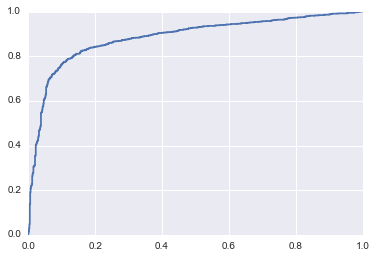

In [130]:
plt.plot(fpr_svm, tpr_svm)

# Area under the Curve for SVM is 89.9%

In [131]:
auc_score_svm = roc_auc_score(y_testSVM, pred_probs_svm[:,1])
print(auc_score_rf)

0.898921966409


# 3.     Decision Trees

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
dtree = DecisionTreeClassifier()

In [41]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [42]:
treepredictions = dtree.predict(X_test)

# The Classification Report shows an average accuracy of 76%, which is slightly better than the 71% obtained with a logistic regression.

In [43]:
print(confusion_matrix(y_test,treepredictions))
print('\n')
print(classification_report(y_test,treepredictions))

[[ 555  285]
 [ 286 1228]]


             precision    recall  f1-score   support

          0       0.66      0.66      0.66       840
          1       0.81      0.81      0.81      1514

avg / total       0.76      0.76      0.76      2354



# Plot the ROC Curve for Trees

In [154]:
pred_probs_trees = dtree.predict_proba(X_test)

In [155]:
fpr_tree, tpr_tree, thresholds_tree = metrics.roc_curve(y_test, pred_probs_trees[:,1])

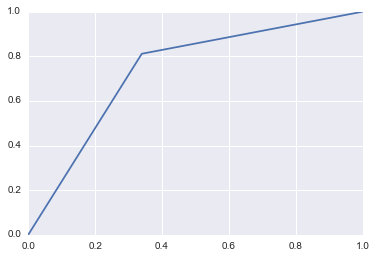

In [157]:
plt.plot(fpr_tree, tpr_tree)

# Area under the Curve for Trees is 74%

In [158]:
auc_score_tree = roc_auc_score(y_test, pred_probs_trees[:,1])
print(auc_score_tree)

0.735905359502


# 4.   Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rfc = RandomForestClassifier(n_estimators=200)

In [46]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [47]:
rfc_pred = rfc.predict(X_test)

# The classification report shows an average accuracy score of 83%, which is better than logistic regression or trees

In [48]:
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[ 659  181]
 [ 231 1283]]


             precision    recall  f1-score   support

          0       0.74      0.78      0.76       840
          1       0.88      0.85      0.86      1514

avg / total       0.83      0.82      0.83      2354



# The ROC curve is pictured below:

In [49]:
pred_probs_rf = rfc.predict_proba(X_test)

In [50]:
fpr_rf, tpr_rf, thresholds_rf = metrics.roc_curve(y_test, pred_probs_rf[:,1])

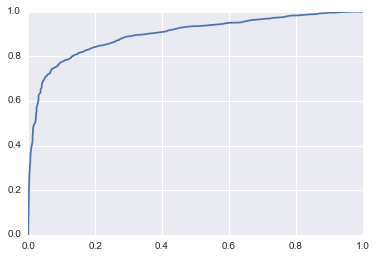

In [51]:
plt.plot(fpr_rf, tpr_rf)

# Area under the Curve is 89.9%

In [52]:
auc_score_rf = roc_auc_score(y_test, pred_probs_rf[:,1])
print(auc_score_rf)

0.898921966409


# 5.     K nearest Neighbor

In [53]:
from sklearn.preprocessing import StandardScaler

# First, I must scale the data around a mean of zero, so that the KNN algorithm can do its job

In [54]:
scaler = StandardScaler()

In [55]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [56]:
scaled_features = scaler.transform(X)

In [57]:
df_feat = pd.DataFrame(scaled_features,columns=X.columns)

In [58]:
df_feat.head()

,Fiscal_Year,AdjEstimatedBaseOptionDuration,Amount,Less1m,1m_10m,10m_30m,Over30m,EstimatedFee,ProbabilityofWinning,1_20,...,Days_in_Qualification,Days_in_PlanningCapture,Days_in_ProposalPriceQuote,Days_in_Negotiation,Days_in_Review,AdditionalMarkets_MultiArea_blank,Education_Workforce_Development,Energy_Environment,Food_Agriculture,Health
0,-1.506131,1.888345,0.079151,-2.002281,2.237009,-0.151478,-0.103776,0.698546,-0.397325,-0.357417,...,-0.203212,-0.110926,-0.396645,-0.186622,-0.462922,-0.546624,-0.278375,-0.474753,-0.182944,1.037285
1,-1.506131,1.888345,-0.163144,0.499430,-0.447025,-0.151478,-0.103776,-0.113179,-1.018433,-0.357417,...,-0.203212,-0.110926,-0.396645,-0.186622,-0.462922,-0.546624,-0.278375,-0.474753,-0.182944,1.037285
2,-1.506131,1.286289,-0.083930,-2.002281,2.237009,-0.151478,-0.103776,0.049166,-0.397325,-0.357417,...,-0.203212,-0.110926,-0.396645,-0.186622,-0.462922,-0.546624,-0.278375,-0.474753,-0.182944,1.037285
3,-1.506131,0.684232,-0.140038,0.499430,-0.447025,-0.151478,-0.103776,1.185580,-0.397325,-0.357417,...,-0.203212,-0.110926,-0.396645,-0.186622,-0.462922,-0.546624,-0.278375,-0.474753,-0.182944,1.037285
4,-1.506131,-0.519882,-0.198539,0.499430,-0.447025,-0.151478,-0.103776,0.698546,-1.639541,2.797851,...,-0.203212,-0.110926,-0.396645,-0.186622,-0.462922,1.829410,-0.278375,-0.474753,-0.182944,-0.964055


# train_test_split the data for KNN:

In [92]:
# Train test split using 33% split

X_trainKnn, X_testKnn, y_trainKnn, y_testKnn = train_test_split(df_feat, y, test_size=0.33, random_state=101)

In [93]:
from sklearn.neighbors import KNeighborsClassifier

In [94]:
knn = KNeighborsClassifier(n_neighbors=1)

In [95]:
knn.fit(X_trainKnn,y_trainKnn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [96]:
predKnn = knn.predict(X_testKnn)

# Classification report shows an average accuracy score of 77% for KNN when k =1, while 71% for logistic regression, 76% for trees and 83% for random forests

In [97]:
print(confusion_matrix(y_testKnn,predKnn))
print('\n')
print(classification_report(y_testKnn,predKnn))

[[ 566  274]
 [ 277 1237]]


             precision    recall  f1-score   support

          0       0.67      0.67      0.67       840
          1       0.82      0.82      0.82      1514

avg / total       0.77      0.77      0.77      2354



# The following for loop calculates the error rates at different k values.  Then I plot k values vs. error rates.  As you can see pictured below  around a k of 26 or is where the error rate first reaches a minimum.


In [147]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_trainKnn,y_trainKnn)
    pred_i = knn.predict(X_testKnn)
    error_rate.append(np.mean(pred_i != y_testKnn))  
    

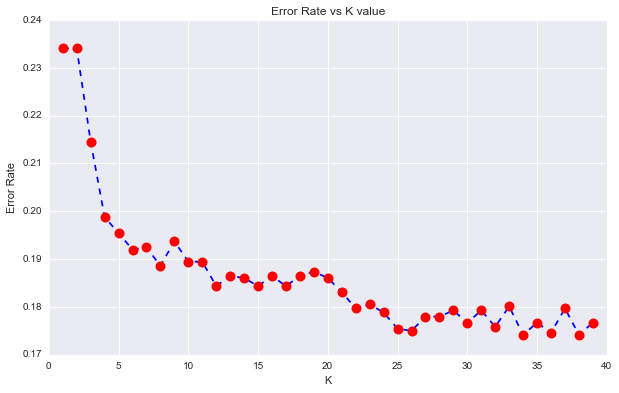

In [148]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# Then I run KNN again with a K of 25, and classification table shows that accuracy improves to 83%

In [149]:
knn = KNeighborsClassifier(n_neighbors=25)

knn.fit(X_trainKnn,y_trainKnn)

predK = knn.predict(X_testKnn)

print(confusion_matrix(y_testKnn,predKnn))
print('\n')
print(classification_report(y_testKnn,predKnn))

[[ 566  274]
 [ 277 1237]]


             precision    recall  f1-score   support

          0       0.67      0.67      0.67       840
          1       0.82      0.82      0.82      1514

avg / total       0.77      0.77      0.77      2354



In [150]:
pred_probs_knn = knn.predict_proba(X_testKnn)

In [151]:
fpr_knn, tpr_knn, threasholds_knn = metrics.roc_curve(y_testKnn, pred_probs_knn[:,1])

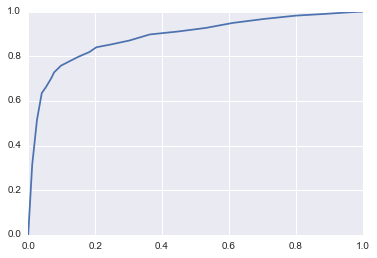

In [152]:
plt.plot(fpr_knn, tpr_knn)

# Area under the Curve for KNN with where K = 25 is 89.9%

In [153]:
auc_score_knn = roc_auc_score(y_testKnn, pred_probs_rf[:,1])
print(auc_score_rf)

0.898921966409


# KNN Plots:

In [68]:
accuracy = []

for i in range(1,40):
    
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_trainK,y_trainK)
    pred_i2 = knn.predict(X_testK)
    accuracy.append(metrics.accuracy_score(y_testK,pred_i2))

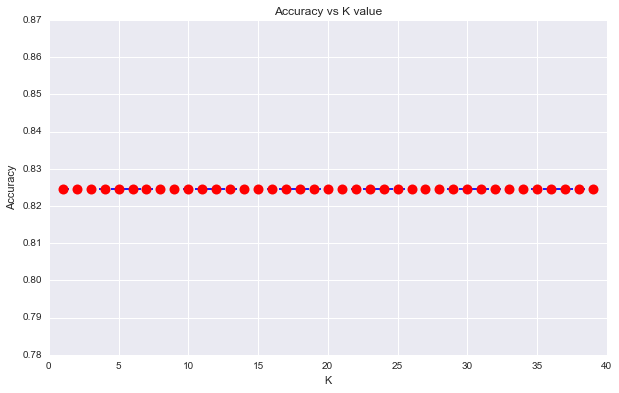

In [69]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Accuracy vs K value')
plt.xlabel('K')
plt.ylabel('Accuracy')

# Plotting Cross-Validation Error Vs. Cross-Validation Variance to determine which features should be used or not:

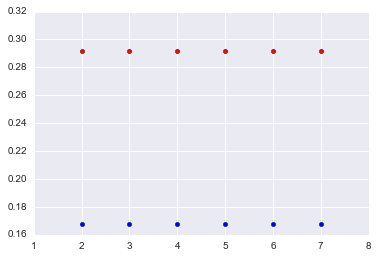

In [70]:
def train_and_cross_val(cols):
    features = X
    target = y
    
    variance_values = []
    mse_values = []
    
    # KFold instance.
    kf = KFold(n=len(pipeline), n_folds=10, shuffle=True, random_state=3)
    
    # Iterate through over each fold.
    for train_index, test_index in kf:
        # Training and test sets.
        X_train, X_test = features.iloc[train_index], features.iloc[test_index]
        y_train, y_test = target.iloc[train_index], target.iloc[test_index]
        
        # Fit the model and make predictions.
        lr = LogisticRegression()
        lr.fit(X_train, y_train)
        predictions2 = lr.predict(X_test)
        
        # Calculate mse and variance values for this fold.
        mse = mse = mean_squared_error(y_test, predictions2)
        var = np.var(predictions2)

        # Append to arrays to do calculate overall average mse and variance values.
        variance_values.append(var)
        mse_values.append(mse)
   
    # Compute average mse and variance values.
    avg_mse = np.mean(mse_values)
    avg_var = np.mean(variance_values)
    return(avg_mse, avg_var)
        
two_mse, two_var = train_and_cross_val(["Amount", "ProbabilityofWinning"])

three_mse, three_var = train_and_cross_val(["Amount", "ProbabilityofWinning", "Days_in_Negotiation"])

four_mse, four_var = train_and_cross_val(["Amount", "ProbabilityofWinning", "Days_in_Negotiation", "ActualBPAmt"])

five_mse, five_var = train_and_cross_val(["Amount", "ProbabilityofWinning", "Days_in_Negotiation", "ActualBPAmt", "Days_in_ProposalPriceQuote"])

six_mse, six_var = train_and_cross_val(["Amount", "ProbabilityofWinning", "Days_in_Negotiation", "ActualBPAmt", "Days_in_ProposalPriceQuote", "Days_in_PlanningCapture"])

seven_mse, seven_var = train_and_cross_val(["Amount", "ProbabilityofWinning", "Days_in_Negotiation", "ActualBPAmt", "Days_in_ProposalPriceQuote","Days_in_PlanningCapture", "Days_in_Review"])


plt.scatter([2,3,4,5,6,7], [two_mse, three_mse, four_mse, five_mse, six_mse, seven_mse], c='red')
plt.scatter([2,3,4,5,6,7], [two_var, three_var, four_var, five_var, six_var, seven_var], c='blue')
plt.show()